# Learn representation

Trains a simple fully-connected neural network on electronic 
health records using treatment assignment as target, and
extracts activations from the last layer. This notebook also does some hyperparameter tuning on the
network.

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from utils.data import load_data
from utils.nn import (
    add_fully_connected, 
    precision_recall,
    add_criteria,
    extract_activations
)

In [2]:
# Load data
datasets = load_data()
dim = datasets.dimension

In [3]:
# Instantiate session and create base variables
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, dim])
y_ = tf.placeholder(tf.float32, shape=[None, 2])

In [10]:
# Hidden layers dimensions
hidden1 = 500
hidden2 = 50
hidden3 = 5

# Actual network creation
h1 = add_fully_connected(x, dim, hidden1, relu=False)
h2 = add_fully_connected(h1, hidden1, hidden2, tanh=True)
h3 = add_fully_connected(h1, hidden1, hidden3, tanh=False)
y_scores = add_fully_connected(h3, hidden3, 2, tanh=False)

cross_entropy, train_step, correct_prediction, accuracy = add_criteria(y_, y_scores, 7.2e-7)

Step 0: 0.477425
Step 1000: 0.537219
Step 2000: 0.574606
Step 3000: 0.5976
Step 4000: 0.61044
Step 5000: 0.619503
Step 6000: 0.627853
Step 7000: 0.633938
Step 8000: 0.639728
Step 9000: 0.645393
Step 10000: 0.650596
Step 11000: 0.656093
Step 12000: 0.661841
Step 13000: 0.66717
Step 14000: 0.671954
Step 15000: 0.676989
Step 16000: 0.683283
Step 17000: 0.68836
Step 18000: 0.693941
Step 19000: 0.699941
Step 20000: 0.705438
Step 21000: 0.710725
Step 22000: 0.71597
Step 23000: 0.72067
Step 24000: 0.724572
Step 25000: 0.729607
Step 26000: 0.734307
Step 27000: 0.739762
Step 28000: 0.743706
Step 29000: 0.748154
Step 30000: 0.753483
Step 31000: 0.757427
Step 32000: 0.761707
Step 33000: 0.765274
Step 34000: 0.770015
Step 35000: 0.774924
Step 36000: 0.779162
Step 37000: 0.781848
Step 38000: 0.785708
Step 39000: 0.789191
Step 40000: 0.792254
Step 41000: 0.795569
Step 42000: 0.798674
Step 43000: 0.801695
Step 44000: 0.804758
Step 45000: 0.80757
Step 46000: 0.809877
Step 47000: 0.811178
Step 48000: 0

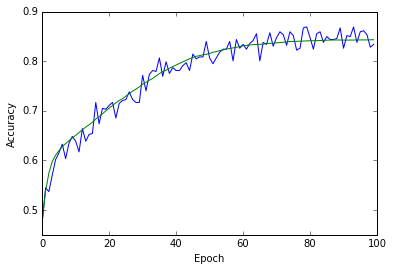

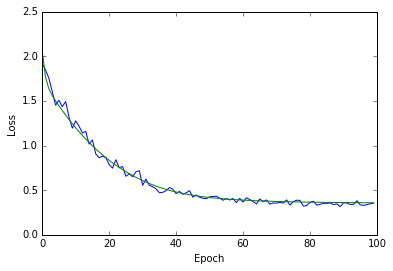

In [11]:
# Keep history to plot accuracies
train_acc = []
val_acc = []
train_losses = []
val_losses = []

# Actually train data
sess.run(tf.initialize_all_variables())

for i in range(100000):
    batch = datasets.train.next_batch(512)
    if i % 1000 == 0:
        train_accuracy = accuracy.eval(
            feed_dict={x: batch[0], y_: batch[1]}
        )
        val_accuracy = accuracy.eval(
            feed_dict={x: datasets.val1._patients, 
                       y_: datasets.val1._labels}
        )
        train_loss = cross_entropy.eval(
            feed_dict={x: batch[0], y_: batch[1]}            
        )
        val_loss = cross_entropy.eval(
            feed_dict={x: datasets.val1._patients, 
                       y_: datasets.val1._labels}            
        )
        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print "Step %d:" % i, val_accuracy
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

print("Validation accuracy %g" % accuracy.eval(
    feed_dict={x: datasets.val1._patients, y_: datasets.val1._labels}
))

# Plot learning curves
plt.figure(1)
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.figure(2)
plt.plot(train_losses)
plt.plot(val_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

# print "Precision, Recall:", precision_recall(x, y_, y_scores, datasets.val1)

In [ ]:
# Extract activations
extract_activations(x, y_, y_scores, datasets.val2, "val2")
extract_activations(x, y_, y_scores, datasets.test, "test")